In [1]:
import numpy as np
import matplotlib.pyplot as plt

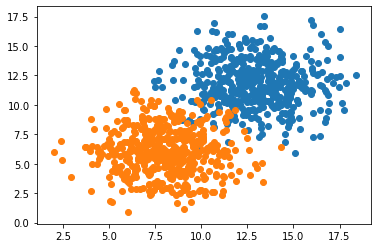

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13,2,n_pts),
              np.random.normal(12,2,n_pts)]).T
Xb = np.array([np.random.normal(8,2,n_pts),
              np.random.normal(6,2,n_pts)]).T
X = np.vstack((Xa,Xb))  #all points
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
plt.scatter(X[:n_pts, 0], X[:n_pts,  1])
plt.scatter(X[n_pts:, 0], X[n_pts:,  1])

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #linear
from tensorflow.keras.layers import Dense #every node is connected to every node in preceding layer
from tensorflow.keras.optimizers import Adam #Stochastic gradient decent (Adagrad, RMSprop)

In [34]:
model = Sequential()
model.add(Dense(units = 1 , input_shape=(2,), activation='sigmoid'))
#optimizer
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 50, shuffle='true')

Train on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 402us/sample - loss: 1.3879 - accuracy: 0.5290
Epoch 2/50
1000/1000 [==============================] - 0s 32us/sample - loss: 0.5364 - accuracy: 0.7110
Epoch 3/50
1000/1000 [==============================] - 0s 29us/sample - loss: 0.4419 - accuracy: 0.8310
Epoch 4/50
1000/1000 [==============================] - 0s 34us/sample - loss: 0.3866 - accuracy: 0.8640
Epoch 5/50
1000/1000 [==============================] - 0s 34us/sample - loss: 0.3415 - accuracy: 0.9080
Epoch 6/50
1000/1000 [==============================] - 0s 31us/sample - loss: 0.3061 - accuracy: 0.9350
Epoch 7/50
1000/1000 [==============================] - 0s 30us/sample - loss: 0.2795 - accuracy: 0.9360
Epoch 8/50
1000/1000 [==============================] - 0s 33us/sample - loss: 0.2526 - accuracy: 0.9490
Epoch 9/50
1000/1000 [==============================] - 0s 38us/sample - loss: 0.2316 - accuracy: 0.9570
Epoch 10/50
1000/1000 [=========

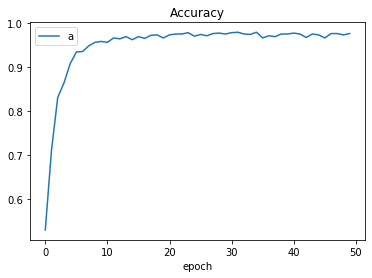

In [35]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend('accuracy')

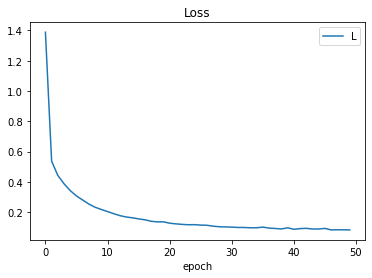

In [36]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend('Loss')

In [67]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1 , max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1 , max(X[:,1]) + 1)
    xx , yy = np.meshgrid(x_span , y_span)
    xx_ , yy_ = xx.ravel() , yy.ravel()
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)
    plt.scatter(X[:n_pts, 0], X[:n_pts,  1])
    plt.scatter(X[n_pts:, 0], X[n_pts:,  1])

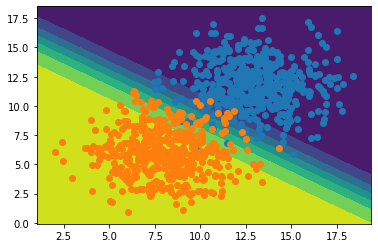

In [80]:
plot_decision_boundary(X,y,model)

Predection is:  [[0.76169604]]


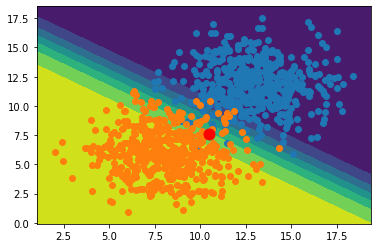

In [82]:
plot_decision_boundary(X,y,model)
x = 10.5
y = 7.6
point = np.array([[x,y]])
predection = model.predict(point)
plt.plot([x],[y], marker='o', markersize = 11 , color='red')
print("Predection is: ", predection)